Let's import needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

Let's import the data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape, test.shape

((10471, 23), (2991, 22))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10471 entries, 0 to 10470
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   studentId                   10471 non-null  int64  
 1   createdDate                 10471 non-null  object 
 2   updatedDate                 10471 non-null  object 
 3   isExpelled                  10471 non-null  object 
 4   expellingReason             5460 non-null   object 
 5   courseCompleted             10471 non-null  object 
 6   isTopPerformer              10471 non-null  bool   
 7   preferedMentorGithubId      0 non-null      float64
 8   readyFullTime               1 non-null      object 
 9   courseId                    10471 non-null  int64  
 10  userId                      10471 non-null  int64  
 11  mentorId                    2609 non-null   float64
 12  cvUrl                       0 non-null      float64
 13  hiredById                   0 n

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   studentId                   2991 non-null   int64  
 1   createdDate                 2991 non-null   object 
 2   updatedDate                 2991 non-null   object 
 3   isExpelled                  2991 non-null   object 
 4   expellingReason             0 non-null      float64
 5   courseCompleted             2991 non-null   object 
 6   preferedMentorGithubId      0 non-null      float64
 7   readyFullTime               0 non-null      float64
 8   courseId                    2991 non-null   int64  
 9   userId                      2991 non-null   int64  
 10  mentorId                    467 non-null    float64
 11  cvUrl                       0 non-null      float64
 12  hiredById                   0 non-null      float64
 13  hiredByName                 0 non

Initially, let's look on the target feature

<AxesSubplot:xlabel='isTopPerformer', ylabel='count'>

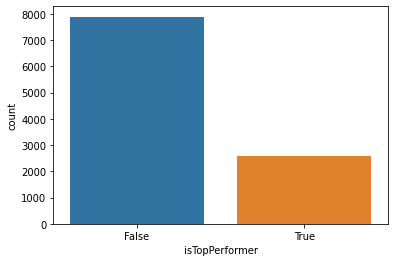

In [6]:
sns.countplot(x='isTopPerformer', data=train)

It seems that target classes are imbalanced. Now we leave it as is, but we will try to make oversampling or undersampling later.

Let's look through all other features

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='isExpelled', ylabel='count'>

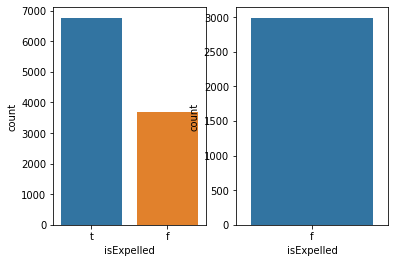

In [7]:
fig, ax =plt.subplots(1,2)
sns.countplot(train['isExpelled'], ax=ax[0])
sns.countplot(test['isExpelled'], ax=ax[1])

<AxesSubplot:xlabel='isExpelled', ylabel='count'>

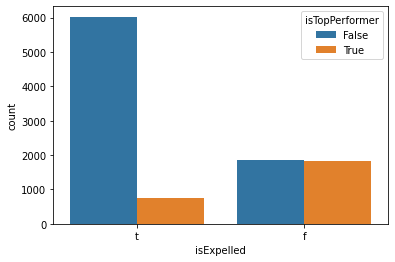

In [8]:
sns.countplot(x='isExpelled', hue='isTopPerformer', data=train)

Well, it seems that we can use this feature. Let's update it

In [9]:
train.loc[train['isExpelled'] == 'f', 'isExpelled'] = 0
train.loc[train['isExpelled'] == 't', 'isExpelled'] = 1
train['isExpelled'] = train['isExpelled'].astype(int)

In [10]:
test.loc[test['isExpelled'] == 'f', 'isExpelled'] = 0
test.loc[test['isExpelled'] == 't', 'isExpelled'] = 1
test['isExpelled'] = test['isExpelled'].astype(int)

The next one

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


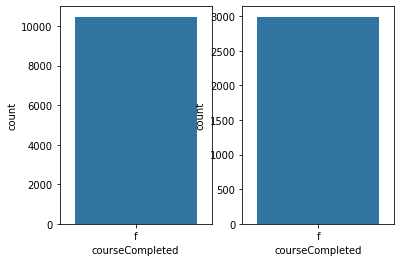

In [11]:
fig, ax =plt.subplots(1,2)
sns.countplot(train['courseCompleted'], ax=ax[0])
sns.countplot(test['courseCompleted'], ax=ax[1])
fig.show()

Well, this feature is unuseful. Skip it. Let's look on the next one.

In [12]:
train.loc[train['repository'].notnull(), 'repository'] = 1
train['repository'] = train['repository'].fillna(0)

In [13]:
test.loc[test['repository'].notnull(), 'repository'] = 1
test['repository'] = test['repository'].fillna(0)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


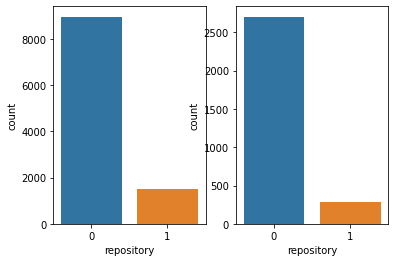

In [14]:
fig, ax =plt.subplots(1,2)
sns.countplot(train['repository'], ax=ax[0])
sns.countplot(test['repository'], ax=ax[1])
fig.show()

<AxesSubplot:xlabel='isTopPerformer', ylabel='count'>

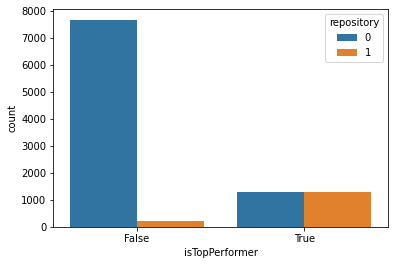

In [15]:
sns.countplot(x='isTopPerformer', hue='repository', data=train)

In [16]:
train.loc[train['mentorId'].notnull(), 'mentorId'] = 1
train['mentorId'] = train['mentorId'].fillna(0)
train['mentorId'] = train['mentorId'].astype(int)

In [17]:
test.loc[test['mentorId'].notnull(), 'mentorId'] = 1
test['mentorId'] = test['mentorId'].fillna(0)
test['mentorId'] = test['mentorId'].astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


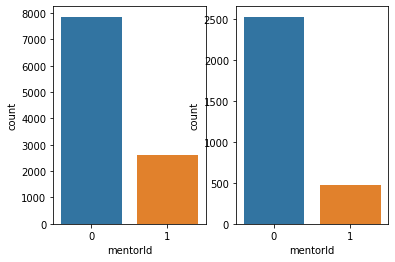

In [18]:
fig, ax =plt.subplots(1,2)
sns.countplot(train['mentorId'], ax=ax[0])
sns.countplot(test['mentorId'], ax=ax[1])
fig.show()

<AxesSubplot:xlabel='isTopPerformer', ylabel='count'>

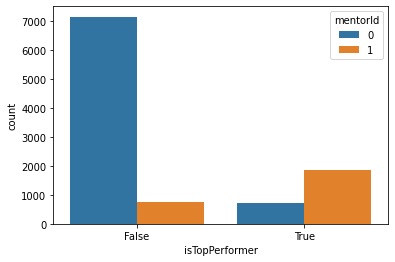

In [19]:
sns.countplot(x='isTopPerformer', hue='mentorId', data=train)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


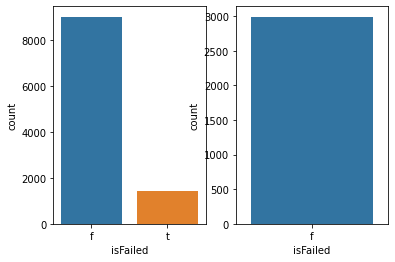

In [20]:
fig, ax =plt.subplots(1,2)
sns.countplot(train['isFailed'], ax=ax[0])
sns.countplot(test['isFailed'], ax=ax[1])
fig.show()

<AxesSubplot:xlabel='isFailed', ylabel='count'>

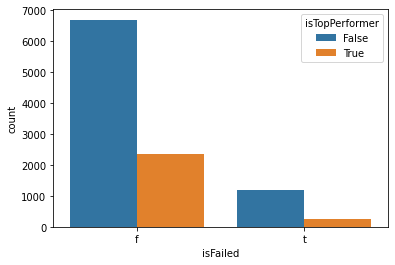

In [21]:
sns.countplot(x='isFailed', hue='isTopPerformer', data=train)

In [22]:
train.loc[train['isFailed'] == 'f', 'isFailed'] = 0
train.loc[train['isFailed'] == 't', 'isFailed'] = 1
train['isFailed'] = train['isFailed'].astype(int)

In [23]:
test.loc[test['isFailed'] == 'f', 'isFailed'] = 0
test.loc[test['isFailed'] == 't', 'isFailed'] = 1
test['isFailed'] = test['isFailed'].astype(int)

Let's do the same actions with some other features

In [24]:
train.loc[train['repositoryLastActivityDate'].notnull(), 'repositoryLastActivityDate'] = 1
train['repositoryLastActivityDate'] = train['repositoryLastActivityDate'].fillna(0)

In [25]:
test.loc[test['repositoryLastActivityDate'].notnull(), 'repositoryLastActivityDate'] = 1
test['repositoryLastActivityDate'] = test['repositoryLastActivityDate'].fillna(0)

In [26]:
train.loc[train['educationHistory'] != '[]', 'educationHistory'] = 1
train.loc[train['educationHistory'] == '[]', 'educationHistory'] = 0
train['educationHistory'] = train['educationHistory'].astype(int)

In [27]:
test.loc[test['educationHistory'] != '[]', 'educationHistory'] = 1
test.loc[test['educationHistory'] == '[]', 'educationHistory'] = 0
test['educationHistory'] = test['educationHistory'].astype(int)

"englishLevel" is needed more actions:  
- define unique values in each dataset 
- merge unique values   
- update values into datasets

In [28]:
a = train['englishLevel'].unique().tolist()
b = test['englishLevel'].unique().tolist()

In [29]:
c = set(a+b)
c

{'3/5',
 'A+',
 'A-2',
 'A0',
 'A1',
 'A1 (Elementary)',
 'A1 Beginner',
 'A1 базовый',
 'A1+',
 'A1-A2',
 'A2',
 'A2 (pre-intermediate)',
 'A2 - B1',
 'A2 - Pre-Intermediate',
 'A2+',
 'A2+ (Streemline certificate 27.12.2019)',
 'A2+ - B1',
 'A2- B1',
 'A2-B1',
 'A2/B1',
 'Advanced',
 'Advanced ',
 'B1',
 'B1 (Средний)',
 'B1+',
 'B1-B2',
 'B1~B2',
 'B2',
 'B2 - Upper Intermediate',
 'B2+',
 'B2-C1',
 'B2-С1',
 'Beginner',
 'C1',
 'C1 (IELTS Academic)',
 'C1/IELTS 7.0',
 'Elementary',
 'Elementary English (A2)',
 'Good',
 'High Proficiency',
 'High-intermedite',
 'IELTS 5.5 / B2',
 'Intermediate',
 'Intermediate ',
 'Intermediate https://englex.ru/your-level/placement/?answer_id=2614678&hidesend=1',
 'Intermediate(B1-2)',
 'Intermediate+',
 'Intermidiate',
 'Native',
 'PRE-Intermediate',
 'Pre intermediate',
 'Pre-Intermediate',
 'Pre-Intermediate ',
 'Pre-intermediate',
 'Pre-intermediate (CEFR A2)',
 'Proficient',
 'Upper Intermediate ',
 'a0',
 'a1',
 'a1+',
 'a2',
 'a2+',
 'advanc

In [30]:
train_test_data = [train, test]

In [31]:
for data in train_test_data:
    data['englishLevel'] = data['englishLevel'].fillna('Z')
    data['englishLevel'] = data['englishLevel'].replace(['natalya.sadov@gmail.com',
                                                         'zero',
                                                         'З',
                                                        ], 'Z')
    data['englishLevel'] = data['englishLevel'].replace(['A+', 
                                                         'A1 (Elementary)',
                                                         'A1 Beginner',
                                                         'A1 базовый',
                                                         'A1+',
                                                         'Beginner',
                                                         'Elementary',
                                                         'a0',
                                                         'a1',
                                                         'a1+',
                                                         'beginer',
                                                         'easy',
                                                         'elementary',
                                                         'А1',
                                                         'Базовый',
                                                         'Начинающий ',
                                                         'на уровне чтения ',
                                                         'A0',
                                                        ], 'A1')
    data['englishLevel'] = data['englishLevel'].replace(['A-2',
                                                         'A1-A2',
                                                         'A2 (pre-intermediate)',
                                                         'A2 - Pre-Intermediate',
                                                         'A2+',
                                                         'A2+ (Streemline certificate 27.12.2019)',
                                                         'A2+ - B1',
                                                         'Elementary English (A2)',
                                                         'PRE-Intermediate',
                                                         'Pre intermediate',
                                                         'Pre-Intermediate',
                                                         'Pre-Intermediate ',
                                                         'Pre-intermediate',
                                                         'Pre-intermediate (CEFR A2)',
                                                         'a2',
                                                         'a2+',
                                                         'intermediate A2',
                                                         'pre intermediate',
                                                         'pre-intermedia',
                                                         'pre-intermediate',
                                                         'pre-intermediate a2',
                                                         'А2',
                                                         'А2+',
                                                        ], 'A2')
    data['englishLevel'] = data['englishLevel'].replace(['3/5',
                                                         'A2 - B1',
                                                         'A2- B1',
                                                         'A2-B1',
                                                         'A2/B1',
                                                         'B1 (Средний)',
                                                         'B1+',
                                                         'Good',
                                                         'Intermediate',
                                                         'Intermediate ',
                                                         'Intermediate https://englex.ru/your-level/placement/?answer_id=2614678&hidesend=1',
                                                         'Intermediate(B1-2)',
                                                         'Intermediate+',
                                                         'Intermidiate',
                                                         'b1',
                                                         'b1+',
                                                         'intermediate',
                                                         'intermediate ',
                                                         'intermediate(B1)',
                                                         'В1',
                                                         'средний',
                                                        ], 'B1')
    data['englishLevel'] = data['englishLevel'].replace(['B1-B2',
                                                         'B1~B2',
                                                         'B2 - Upper Intermediate',
                                                         'B2+',
                                                         'High-intermedite',
                                                         'IELTS 5.5 / B2',
                                                         'Upper Intermediate ',
                                                         'b1-b2',
                                                         'b2',
                                                         'b2+',
                                                         'up-intermediate',
                                                         'upper intermediate B1-B2',
                                                         'upper-intermediate',
                                                        ],
                                                        'B2')
    data['englishLevel'] = data['englishLevel'].replace(['Advanced',
                                                         'Advanced ',
                                                         'B2-C1',
                                                         'B2-С1',
                                                         'C1 (IELTS Academic)',
                                                         'C1/IELTS 7.0',
                                                         'advanced',
                                                         'b2-c1',
                                                         'c1',
                                                         'c1+',
                                                         'С1',
                                                        ], 'C1')
    data['englishLevel'] = data['englishLevel'].replace(['High Proficiency',
                                                         'Native',
                                                         'Proficient',
                                                         'c2',
                                                        ], 'C2')

In [32]:
train['englishLevel'].unique()

array(['Z', 'B1', 'A2', 'A1', 'B2', 'C1', 'C2'], dtype=object)

In [33]:
test['englishLevel'].unique()

array(['Z', 'A2', 'A1', 'B1', 'B2', 'C1', 'C2'], dtype=object)

In [34]:
pd.crosstab(train['englishLevel'], train['isTopPerformer'])

isTopPerformer,False,True
englishLevel,,
A1,985,290
A2,1274,709
B1,898,494
B2,381,203
C1,100,55
C2,18,3
Z,4236,825


In [35]:
#level = {'Z':0, 'A1':1, 'A2':2, 'B1':3, 'B2':4, 'C1':5, 'C2':6}
level = {'Z':0, 'A1':0, 'A2':0, 'B1':1, 'B2':1, 'C1':1, 'C2':0}
for data in train_test_data:
    data['englishLevel'] = data['englishLevel'].map(level).astype(int)

In [36]:
train['englishLevel'].unique()

array([0, 1])

In [37]:
test['englishLevel'].unique()

array([0, 1])

Let's look through courses data

In [38]:
np.sort(train['courseId'].unique())

array([ 1,  2,  4,  5,  6,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       23, 27])

<AxesSubplot:xlabel='courseId', ylabel='count'>

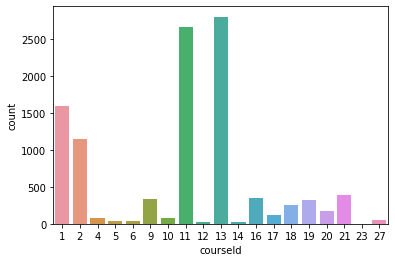

In [39]:
sns.countplot(x='courseId', data=train)

<AxesSubplot:xlabel='courseId', ylabel='count'>

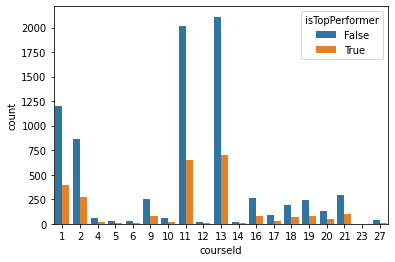

In [40]:
sns.countplot(x='courseId', hue='isTopPerformer', data=train)

In [41]:
np.sort(test['courseId'].unique())

array([ 1,  2,  4,  5,  6,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       23, 27, 28, 29])

<AxesSubplot:xlabel='courseId', ylabel='count'>

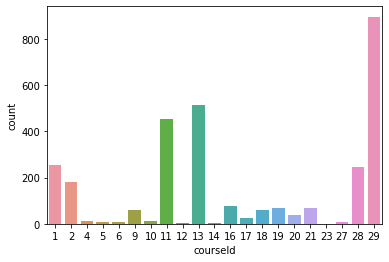

In [42]:
sns.countplot(x='courseId', data=test)

Let's leave courses with good attention (number of pupils is near 50)

In [43]:
train = train.query('courseId in [1,2,9,11,13,16,17,18,19,20,21]')

Now let's take some inforamtion from 'Course' file, do some updates and add this data to initial datasets.

In [44]:
course = pd.read_csv('data/course.csv')
course_temp = course[['courseId', 'primarySkillId', 'alias', 'completed']]

In [45]:
for i in ['test-course', 'ios-2020', 'android-2020', 'js-fundamentals']:
    course_temp.loc[course_temp['alias'] == i, 'alias'] = i+'-q'

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
course_temp.loc[course_temp['alias'] == 'rs-uz-2019-q3', 'alias'] = 'rs-2019-q3'
course_temp.loc[course_temp['alias'] == 'rs-st-2019-q1', 'alias'] = 'rs-2019-q1'
course_temp.loc[course_temp['alias'] == 'rss-pl-2020-q1', 'alias'] = 'rss-2020-q1'

In [47]:
course_temp['skill'] = course_temp['alias'].apply(lambda x: x.split('-')[0])
course_temp['quarter'] = course_temp['alias'].apply(lambda x: x.split('-')[2])

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
primSkill = {'ios-obj-c' : 0,
             'android-kotlin': 0,
             'nodejs': 0,
             'javascript': 1
            }
course_temp['primarySkillId'] = course_temp['primarySkillId'].map(primSkill).astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
skill_repl = {'react': '0',
              'test': '1',
              'ios': '0',
              'rs': '1',
              'android': '0',
              'st': '1',
              'angular': '0',
              'js': '1',
              'rss': '1',
              'nodejs': '0',
             }
course_temp['skill'] = course_temp['skill'].map(skill_repl).astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [50]:
quarter_repl = {'q': 0,
                'Q1': 1,
                'q1': 1,
                'Q3': 2,
                'q3': 2
               }
course_temp['quarter'] = course_temp['quarter'].map(quarter_repl).astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [51]:
course_temp.loc[course_temp['completed'] == 'f', 'completed'] = 0
course_temp.loc[course_temp['completed'] == 't', 'completed'] = 1
course_temp['completed'] = course_temp['completed'].astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
train = pd.merge(train,course_temp.drop(['alias'], axis=1), on=['courseId'])
test = pd.merge(test,course_temp.drop(['alias'], axis=1), on=['courseId'])

In [53]:
train.shape, test.shape

((10143, 27), (2991, 26))

Now let's take some information from tasks and tasks-results

In [54]:
task = pd.read_csv('data/task.csv')

In [55]:
task_results = pd.read_csv('data/task_results.csv')

In [56]:
task_temp = task[['courseId', 'courseTaskId', 'maxScore']]

Some tasks don't have maxScore value. Let's fill them by max score that was achieved by students

In [57]:
for i in [1, 2, 4, 5, 6, 9, 10]:
    for j in task_temp[task_temp['courseId'] == i]['courseTaskId'].tolist():
        if np.isnan(task_temp['maxScore'][(task_temp['courseId'] == i) & (task_temp['courseTaskId'] == j)].item()):
            task_temp.loc[(task_temp['courseId'] == i) & (task_temp['courseTaskId'] == j), 'maxScore'] = \
                np.max(task_results[task_results['courseTaskId'] == j]['score'].unique())

Find the total Score of each course

In [58]:
task_temp_sum = task_temp.groupby(['courseId']).agg({'maxScore': 'sum'}).reset_index()

And find the number of tasks for each course

In [59]:
task_temp_sum['len_tasks'] = task_temp.groupby(['courseId']).agg({'courseTaskId': 'count'})['courseTaskId'].tolist()

In [60]:
task_temp_sum

,courseId,maxScore,len_tasks
0,1,2027.0,15
1,2,1781.0,15
2,4,2674.0,18
3,5,1192792.0,17
4,6,558.0,6
5,9,1960.0,16
6,10,1250.0,12
7,11,4228.0,36
8,12,1290.0,13
9,13,6083.0,41


Let's add it to the initial datasets

In [61]:
train = pd.merge(train,task_temp_sum, on=['courseId'])
test = pd.merge(test,task_temp_sum, on=['courseId'])

In [62]:
train.shape, test.shape

((10143, 29), (2991, 28))

Now let's take the data about student's results: score and passed tasks

In [63]:
task_results_temp = task_results[['studentId', 'courseTaskId', 'score']]

In [64]:
task_results.shape

(94262, 10)

In [65]:
task_results_temp = pd.merge(task_results_temp, task_temp[['courseTaskId', 'courseId']], on=['courseTaskId'])

In [66]:
task_results_temp.shape

(94262, 4)

In [67]:
task_results_temp['studentId'].nunique()

8430

In [68]:
task_results_temp_sum = task_results_temp.groupby(['studentId', 'courseId']).agg({'score': 'sum'}).reset_index()

In [69]:
task_results_temp_sum['number_tasks'] = task_results_temp.groupby(['studentId', 'courseId']).agg({'courseTaskId': 'count'})['courseTaskId'].tolist()

In [81]:
task_results_temp_sum.head()

,studentId,courseId,score,number_tasks
0,1,1,1544,12
1,2,1,590,6
2,3,1,0,2
3,4,1,255,5
4,5,1,8,2


Some students don't have scores. So, let's find these students and fill Nan values by 0

In [70]:
train_st = train['studentId'].unique().tolist()
rez_st = task_results['studentId'].unique().tolist()
train_empty = list(set(train_st) - set(rez_st))

In [71]:
train_course_empty = []
for i in train_empty:
    train_course_empty.append(train.loc[train['studentId'] == i]['courseId'].item())

In [72]:
train_score_empty = [0 for i in range(len(train_empty))]
train_tasks_empty = [0 for i in range(len(train_empty))]

In [73]:
train_empty_df = pd.DataFrame({'studentId': train_empty, 
                              'courseId': train_course_empty,
                              'score': train_score_empty,
                              'number_tasks': train_tasks_empty
                             })

In [74]:
task_results_temp_sum = pd.concat([task_results_temp_sum, train_empty_df], ignore_index=True)

In [75]:
test_st = test['studentId'].unique().tolist()
test_empty = list(set(test_st) - set(rez_st))

In [76]:
test_course_empty = []
for i in test_empty:
    test_course_empty.append(test.loc[test['studentId'] == i]['courseId'].item())

In [77]:
test_score_empty = [0 for i in range(len(test_empty))]
test_tasks_empty = [0 for i in range(len(test_empty))]

In [78]:
test_empty_df = pd.DataFrame({'studentId': test_empty, 
                              'courseId': test_course_empty,
                              'score': test_score_empty,
                              'number_tasks': test_tasks_empty
                             })

In [79]:
task_results_temp_sum = pd.concat([task_results_temp_sum, test_empty_df], ignore_index=True)

In [80]:
task_results_temp_sum.shape

(13447, 4)

Let's add this data to the initial datasets

In [82]:
train = pd.merge(train,task_results_temp_sum, on=['studentId', 'courseId'])
test = pd.merge(test,task_results_temp_sum, on=['studentId', 'courseId'])

Let's find what part of course's maxScore and tasks each sudent did

In [83]:
train['score_part'] = train['score'] / train['maxScore']
test['score_part'] = test['score'] / test['maxScore']

In [84]:
train['tasks_part'] = train['number_tasks'] / train['len_tasks']
test['tasks_part'] = test['number_tasks'] / test['len_tasks']

In [85]:
train.shape, test.shape

((10143, 33), (2991, 32))

Now let's do data permutation

In [86]:
train = train.sample(frac = 1)

In [87]:
test = test.sample(frac = 1)

In [88]:
train.head()

,studentId,createdDate,updatedDate,isExpelled,expellingReason,courseCompleted,isTopPerformer,preferedMentorGithubId,readyFullTime,courseId,userId,mentorId,cvUrl,hiredById,hiredByName,isFailed,startDate,endDate,repository,repositoryLastActivityDate,idUser,educationHistory,englishLevel,primarySkillId,completed,skill,quarter,maxScore,len_tasks,score,number_tasks,score_part,tasks_part
5450,11909,2020-02-06 06:14:14.457101,2020-07-01 21:12:33.275929,1,Прекратил обучение,f,True,NaN,NaN,13,9687,1,NaN,NaN,NaN,0,2020-02-06 06:14:14.454+00,2020-05-18 07:50:29.31+00,1,0,9687,0,0,1,1,1,1,6083.0,41,2564,30,0.421503,0.731707
6830,5012,2019-06-25 10:02:39.616027,2019-08-06 12:04:47.324538,0,NaN,f,False,NaN,NaN,9,2889,1,NaN,NaN,NaN,0,2017-12-31 21:00:00.01+00,2018-06-30 21:00:00.01+00,0,0,2889,1,1,1,1,1,1,1960.0,16,700,11,0.357143,0.687500
1118,8796,2019-10-04 07:08:03.586064,2019-10-04 07:08:03.586064,1,Failed stage 1,f,False,NaN,NaN,11,7305,0,NaN,NaN,NaN,0,2019-10-04 07:08:03.584+00,2019-11-05 21:14:47.316085+00,0,0,7305,0,0,1,1,1,2,4228.0,36,0,2,0.000000,0.055556
4620,10065,2020-02-02 10:34:36.37635,2020-08-23 20:27:10.960391,1,no completed tasks,f,False,NaN,NaN,13,8506,0,NaN,NaN,NaN,0,2020-02-02 10:34:36.374+00,2020-04-14 17:34:16.479+00,0,0,8506,0,0,1,1,1,1,6083.0,41,0,0,0.000000,0.000000
9410,20,2019-04-22 16:15:16.284972,2019-08-14 10:45:11.681663,0,NaN,f,True,NaN,NaN,1,755,1,NaN,NaN,NaN,0,2019-01-01 00:49:13.461+00,2019-08-25 00:49:13.461+00,0,0,755,1,0,1,1,1,1,2027.0,15,1510,12,0.744943,0.800000


Now let's drop some unuseful features

In [89]:
train = train.drop(['studentId',
                    'createdDate',
                    'updatedDate',
                    #'isExpelled',
                    'expellingReason',
                    'courseCompleted',
                    'preferedMentorGithubId',
                    'readyFullTime',
                    'courseId',
                    'userId',
                    'cvUrl',
                    'hiredById',
                    'hiredByName',
                    #'isFailed',
                    #'repositoryLastActivityDate',
                    'idUser',
                    'startDate',
                    'endDate',
                    #'educationHistory',
                    #'englishLevel',
                    'primarySkillId',
                    #'completed',
                    #'skill',
                    #'quarter',
                    'maxScore',
                    'len_tasks',
                    'score',
                    'number_tasks',
                   ], axis=1)

In [90]:
test = test.drop(['createdDate',
                  'updatedDate',
                  #'isExpelled',
                  'expellingReason',
                  'courseCompleted',
                  'preferedMentorGithubId',
                  'readyFullTime',
                  'courseId',
                  'userId',
                  'cvUrl',
                  'hiredById',
                  'hiredByName',
                  #'isFailed',
                  #'repositoryLastActivityDate',
                  'idUser',
                  'startDate',
                  'endDate',
                  #'educationHistory',
                  #'englishLevel',
                  'primarySkillId',
                  #'completed',
                  #'skill',
                  #'quarter',
                  'maxScore',
                  'len_tasks',
                  'score',
                  'number_tasks',
                   ], axis=1)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 5450 to 6836
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isExpelled                  10143 non-null  int64  
 1   isTopPerformer              10143 non-null  bool   
 2   mentorId                    10143 non-null  int64  
 3   isFailed                    10143 non-null  int64  
 4   repository                  10143 non-null  int64  
 5   repositoryLastActivityDate  10143 non-null  int64  
 6   educationHistory            10143 non-null  int64  
 7   englishLevel                10143 non-null  int64  
 8   completed                   10143 non-null  int64  
 9   skill                       10143 non-null  int64  
 10  quarter                     10143 non-null  int64  
 11  score_part                  10143 non-null  float64
 12  tasks_part                  10143 non-null  float64
dtypes: bool(1), float64(2), int64

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 235 to 843
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   studentId                   2991 non-null   int64  
 1   isExpelled                  2991 non-null   int64  
 2   mentorId                    2991 non-null   int64  
 3   isFailed                    2991 non-null   int64  
 4   repository                  2991 non-null   int64  
 5   repositoryLastActivityDate  2991 non-null   int64  
 6   educationHistory            2991 non-null   int64  
 7   englishLevel                2991 non-null   int64  
 8   completed                   2991 non-null   int64  
 9   skill                       2991 non-null   int64  
 10  quarter                     2991 non-null   int64  
 11  score_part                  2991 non-null   float64
 12  tasks_part                  2991 non-null   float64
dtypes: float64(2), int64(11)
memory 

Let's convert target feature to needed format

In [93]:
train['isTopPerformer'] = train['isTopPerformer'].astype(str)

In [94]:
train.loc[train['isTopPerformer'] == 'False', 'isTopPerformer'] = 0
train.loc[train['isTopPerformer'] == 'True', 'isTopPerformer'] = 1
train['isTopPerformer'] = train['isTopPerformer'].astype(int)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 5450 to 6836
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isExpelled                  10143 non-null  int64  
 1   isTopPerformer              10143 non-null  int64  
 2   mentorId                    10143 non-null  int64  
 3   isFailed                    10143 non-null  int64  
 4   repository                  10143 non-null  int64  
 5   repositoryLastActivityDate  10143 non-null  int64  
 6   educationHistory            10143 non-null  int64  
 7   englishLevel                10143 non-null  int64  
 8   completed                   10143 non-null  int64  
 9   skill                       10143 non-null  int64  
 10  quarter                     10143 non-null  int64  
 11  score_part                  10143 non-null  float64
 12  tasks_part                  10143 non-null  float64
dtypes: float64(2), int64(11)
memo

In [96]:
test.head()

,studentId,isExpelled,mentorId,isFailed,repository,repositoryLastActivityDate,educationHistory,englishLevel,completed,skill,quarter,score_part,tasks_part
235,6411,0,1,0,1,0,0,0,1,1,2,0.274834,0.388889
1065,10525,0,0,0,1,0,0,0,1,1,1,0.428736,0.756098
2284,13349,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000
887,11040,0,1,0,1,1,1,1,1,1,1,1.153543,1.536585
1822,15283,0,0,0,0,0,0,0,0,0,2,0.000000,0.000000


Let's look on correlation matrix

<AxesSubplot:>

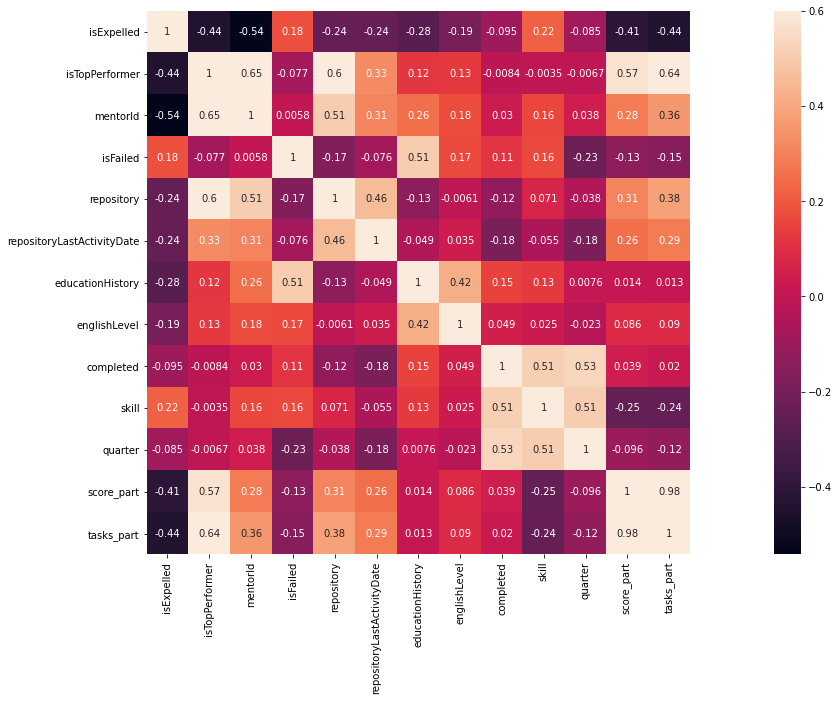

In [98]:
plt.figure(figsize=(30,10))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

Let's drop the target feature and define X and y datasets for model training

In [99]:
X = train.drop(['isTopPerformer'], axis=1)
y = train['isTopPerformer']

In [100]:
X_test = test.drop(['studentId'], axis=1)

In [102]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [103]:
rs_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

As we mentioned earlier, our target classes are imbalanced. Let's use SMOTE library.

In [104]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

Let's define some models

In [105]:
lr = LogisticRegression(C=0.001, class_weight='balanced', max_iter=10000, random_state=42)
rfc = RandomForestClassifier(random_state=42)
scaler = StandardScaler()

Train models one-by-one with cross-validation and save results

In [106]:
models_f1 = []

# Without feature scaling, logistic regression
models_f1.append(cross_val_score(lr, X, y, scoring='f1', cv=rs_fold).mean())

#With scaling StandardScaler + LogisticRegression
model_scaling = make_pipeline(StandardScaler(), lr)
models_f1.append(cross_val_score(model_scaling, X, y, scoring='f1', cv=rs_fold).mean())

# Without SMOTE + logistic regression
steps_lr = [('over', over), ('under', under), ('model', lr)]
pipeline_lr = Pipeline(steps=steps_lr)
models_f1.append(cross_val_score(pipeline_lr, X, y, scoring='f1', cv=rs_fold).mean())

#With SMOTE + StandardScaler + LogisticRegression
steps_scaling_lr = [('over', over), ('under', under), ('scaling', StandardScaler()), ('model', lr)]
pipeline_scaling_lr = Pipeline(steps=steps_scaling_lr)
models_f1.append(cross_val_score(pipeline_scaling_lr, X, y, scoring='f1', cv=rs_fold).mean())

# Without feature scaling, RandomForestClassification
models_f1.append(cross_val_score(rfc, X, y, scoring='f1', cv=rs_fold).mean())

#With scaling StandardScaler + RFC
model_scaling_rfc = make_pipeline(StandardScaler(), rfc)
models_f1.append(cross_val_score(model_scaling_rfc, X, y, scoring='f1', cv=rs_fold).mean())

# Without SMOTE+RandomForestClassification
steps_rfc = [('over', over), ('under', under), ('model', rfc)]
pipeline_rfc = Pipeline(steps=steps_rfc)
models_f1.append(cross_val_score(pipeline_rfc, X, y, scoring='f1', cv=rs_fold).mean())

In [107]:
accuracy_df = pd.DataFrame({'f1': models_f1}, 
                           index = [
                                    'LogisticRegression', 'StandardScaler+LogisticRegression',
                                    'SMOTE+LogisticRegression', 'SMOTE+StandardScaler+LogisticRegression',
                                    'RFC', 'StandardScaler+RFC', 'SMOTE+RFC'
                                   ])
accuracy_df

,f1
LogisticRegression,0.829039
StandardScaler+LogisticRegression,0.836251
SMOTE+LogisticRegression,0.827468
SMOTE+StandardScaler+LogisticRegression,0.833092
RFC,0.938778
StandardScaler+RFC,0.939106
SMOTE+RFC,0.936339


It seems that RandomForest was overfitted.  
So, let's take the following combination: StandardScaler+LogisticRegression

In [108]:
def make_submission(df, pred, n):
    '''
    Create submission file
    :param df: test dataframe
    :param pred: predictions
    :n: numner of the file
    :returns: submission file in the appropriate format
    '''
    submission = pd.DataFrame({
            "studentId": df["studentId"],
            "isTopPerformer": pred
        })

    submission.to_csv('submission_RSS_{}.csv'.format(n), index=False)

In [109]:
model_scaling.fit(X, y)
y_pred_scaling_lr = model_scaling.predict(X_test)
y_pred_fin_scaling_lr = []
for i in y_pred_scaling_lr:
    if i == 0:
        y_pred_fin_scaling_lr.append('False')
    else:
        y_pred_fin_scaling_lr.append('True')
make_submission(test, y_pred_fin_scaling_lr, 1)